<a href="https://colab.research.google.com/github/yuvrajdevrukhkar/NLP-Lab/blob/main/NLP_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
print(len(df))
for i in range(0, len(df)):
 review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
 review = review.lower()
 review = review.split()

 review = [ps.stem(word) for word in review if not word in stopwords]
 review = ' '.join(review)
 corpus.append(review)

5572


TypeError: argument of type 'LazyCorpusLoader' is not iterable

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download the stopwords corpus if not already downloaded
import nltk
nltk.download('stopwords')

ps = PorterStemmer()
corpus = []

# Assuming 'df' is a DataFrame containing text data in the column 'v2'
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
    review = review.lower()
    review = review.split()

    # Remove stopwords and perform stemming
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print(corpus[2])
print(len(corpus))

free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli
5572


In [8]:
 #Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
print(X[0])
y=pd.get_dummies(df['v1'])
print(y)
y=y.iloc[:,0].values
print(y)


[0 0 0 ... 0 0 0]
        ham   spam
0      True  False
1      True  False
2     False   True
3      True  False
4      True  False
...     ...    ...
5567  False   True
5568   True  False
5569   True  False
5570   True  False
5571   True  False

[5572 rows x 2 columns]
[ True  True False ...  True  True  True]


In [12]:
 #Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
spam_detect_model = GaussianNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)


In [13]:
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Testing accuracy ",accuracy_score(y_test,y_pred))
print("Classification Report ",classification_report(y_test,y_pred))


Testing accuracy  0.8708520179372198
Classification Report                precision    recall  f1-score   support

       False       0.50      0.88      0.64       145
        True       0.98      0.87      0.92       970

    accuracy                           0.87      1115
   macro avg       0.74      0.88      0.78      1115
weighted avg       0.92      0.87      0.88      1115



In [17]:
print("Confusion Matrix ",confusion_matrix(y_test,y_pred))


Confusion Matrix  [[128  17]
 [127 843]]


<Axes: >

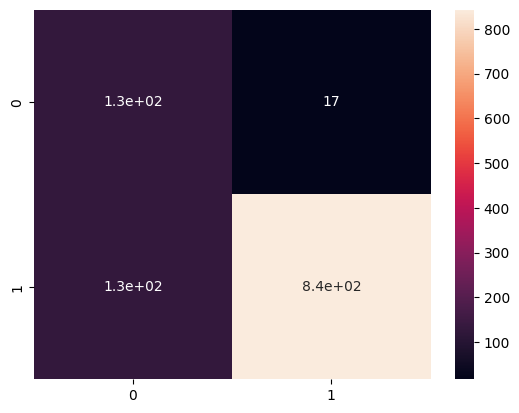

In [18]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


In [20]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train, y_train)
y_predict1=svc_model.predict(X_test)
print("Testing accuracy ",accuracy_score(y_test,y_predict1))
print("Classification Report ",classification_report(y_test,y_predict1))


Testing accuracy  0.9856502242152466
Classification Report                precision    recall  f1-score   support

       False       1.00      0.89      0.94       145
        True       0.98      1.00      0.99       970

    accuracy                           0.99      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.99      0.99      1115

